***

<center> <h1>Historical Voting Records for King County</h1> </center>

***

***

<center> <h3> Load relevant libraries for the task</h3> </center>

***

In [1]:
## Libraries for connection and retrieval from the database
import fireo  
from google.cloud.firestore import Client
from google.auth.credentials import AnonymousCredentials
from cdp_backend.database import models as db_models

## Libraries for working with the data files
import pandas as pd

## For plotting
from matplotlib import pyplot as plt
import numpy as np

In [2]:
## Open a connection to the King County Database

king_county = fireo.connection(client=Client(
    project="cdp-king-county-b656c71b",
    credentials=AnonymousCredentials()
))

***

<center> <h3> Fetch all historical votes from data base</h3> </center>

***

In [3]:
############ Select all of the records from the Vote table ############

## If you want to specify a certain amount of records, just use an argument within fetch() function.
voting_records = list(db_models.Vote.collection.fetch()) 

## Preview file
voting_records[0:5]

In [59]:
## Total voting records to date:

print("Total Voting Records To Date:", len(voting_records))

Total Voting Records To Date: 1850


***

* These files actually just contain information about the voting records we are interested in.
* In order to work with the files we need to "unpack" them using this information we retrieved.

***

In [54]:
## Function to unpack voting records with data retrieved

def unpack_vote_objects(db_models_objects):
    '''
    Takes a list of db_models objects and returns a pandas dataframe.
    
    '''
    unpack = list(map(lambda x: {**x.to_dict(), 'id': x.id}, db_models_objects))
    voting_records_df = pd.DataFrame(unpack)
    voting_records_df.set_index('id', inplace=True)
    return(voting_records_df)

## Call unpack function on our list of objects
voting_records_df = unpack_vote_objects(voting_records)

In [55]:
# Preview random rows of dataframe
voting_records_df.sample(12)

,matter_ref,event_ref,event_minutes_item_ref,person_ref,decision,in_majority,external_source_id,key
id,,,,,,,,
52ef4766db18,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163368,vote/52ef4766db18
92a4dd214022,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164119,vote/92a4dd214022
686d97c6a1d9,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164156,vote/686d97c6a1d9
bc2e2aa0f672,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163876,vote/bc2e2aa0f672
c7a7c3a7840a,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163637,vote/c7a7c3a7840a
2105bc1d693d,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,164091,vote/2105bc1d693d
9e0be97e7578,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163947,vote/9e0be97e7578
fe4356f68618,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,163562,vote/fe4356f68618
52154cb9a101,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,<fireo.queries.query_wrapper.ReferenceDocLoade...,Approve,True,162824,vote/52154cb9a101


***

* We can see that most of the columns in our dataframe are still in the wrapped location data format from the database.
* For the sake of this notebook we will just be looking at the "decision" and "in_majority" columns.
* First off we will find out what possible values each of these variables can take on.

***

In [56]:
## Get the unique values of decision column
values = list(voting_records_df.decision.unique())
values

['Approve', 'Reject']

***

<center> <h3>Proportions of Voting Decisions</h3> </center>

***

***

* It looks like there are only two values in the decision column of our dataframe, possible values are: "Approve" or "Reject".
* Let's tally up the totals for both approved and rejected votes and see what the proportion is.

***

In [57]:
## Count up the values for both approved and rejected votes
totals = voting_records_df['decision'].value_counts()
totals_df = pd.DataFrame(totals)
totals_df

,decision
Approve,1836
Reject,14


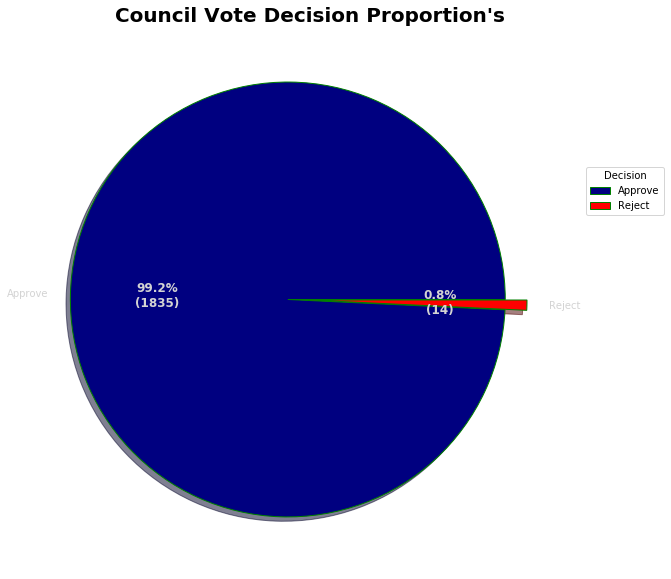

In [58]:
## Plotting proportion of votes
totals_data = totals[0], totals[1]


## Explode data
explode = (0.1, 0.0)

## Color parameters
colors = ( "navy", "red")

## 3D properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

## Function to Calculate and Display Proportions
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(totals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
## Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(totals_data,
                                  autopct = lambda pct: func(pct, totals_data),
                                  explode = explode,
                                  labels = values,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="lightgrey"))
 
## Plot Legend
ax.legend(wedges, values,
          title ="Decision",
          loc ="center left",

          bbox_to_anchor =(1, 0, .5, 1.4))
 
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Council Vote Decision Proportions",
            size = 20, weight ="bold")
 
## Display Plot
plt.show()
